# Section 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Section 2: Exploring Data

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic['Fare'].max()

512.32920000000001

In [6]:
titanic['Fare'].min()

0.0

In [7]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
z = titanic.isnull().sum()
z

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

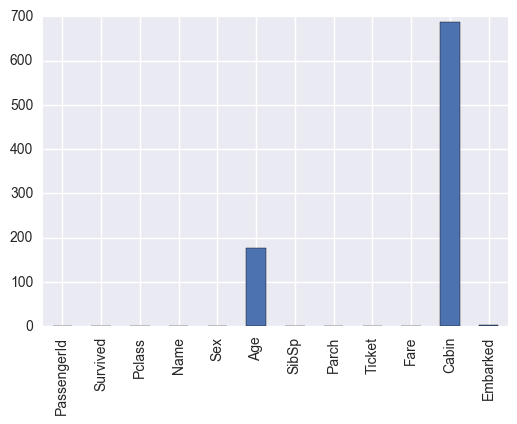

In [11]:
z.plot(kind = 'bar')

In [12]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


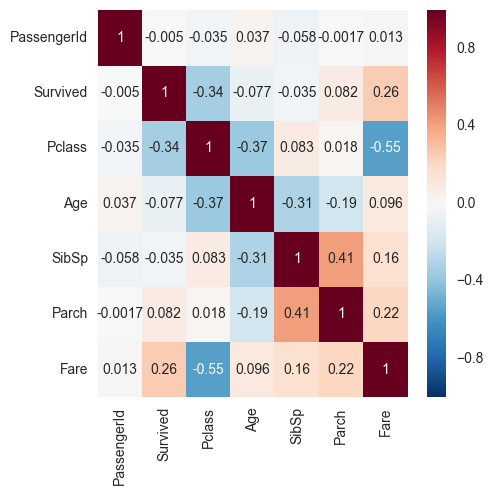

In [15]:
plt.figure(figsize= (5,5))
sns.heatmap(titanic.corr(), annot = True)

# Section 3: Cleaning Data

Having explored our data and found out some general chracteristics such as the shape, size, number of men vs women, and most expensive ticket price; we are now ready to clean our data.  

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female':1})

In [18]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)


In [19]:
titanic.dropna(subset = ['Embarked'],inplace = True)

In [20]:
titanic['Cabin'] = titanic['Cabin'].fillna(value = '¯\(ツ)/¯')


In [21]:
titanic['Family_Count'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


How many Reverends were on the Titanic? 

In [22]:
titanic['IsReverend'] = titanic['Name']

In [23]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,¯\(ツ)/¯,S,1,"Braund, Mr. Owen Harris"


In [24]:
y = titanic['IsReverend'].str.contains('Rev.')

In [25]:
titanic[y]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",0,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,"Byles, Rev. Thomas Roussel Davids"
150,151,0,2,"Bateman, Rev. Robert James",0,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,"Bateman, Rev. Robert James"
249,250,0,2,"Carter, Rev. Ernest Courtenay",0,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,"Carter, Rev. Ernest Courtenay"
626,627,0,2,"Kirkland, Rev. Charles Leonard",0,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,"Kirkland, Rev. Charles Leonard"
848,849,0,2,"Harper, Rev. John",0,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,"Harper, Rev. John"
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,"Montvila, Rev. Juozas"


In [26]:
titanic['IsReverend'].str.contains('Rev.').value_counts()

False    883
True       6
Name: IsReverend, dtype: int64

In [27]:
dummies = pd.get_dummies(titanic['Embarked'])

I choose not to drop the Embarked column even after creating our new dummy columns so it would be easier
to visualize what is going on. 

In [28]:
titanic = pd.concat([titanic,dummies],axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,"Braund, Mr. Owen Harris",0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,"Heikkinen, Miss. Laina",0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,"Allen, Mr. William Henry",0,0,1


# Section 4: Exploratory analysis
Now that our data has been cleaned and we have replaced or dropped null values and converted strings into numbers,lets do some basic analysis on the data! 

In [29]:
# 1 What was the survival rate overall?
x = titanic['Survived'].mean()
x * 100

38.24521934758155

In [30]:
# 2 Which gender fared the worst? What was their survival rate
titanic.pivot_table(index = 'Sex', values = 'Survived', aggfunc = 'mean')
#Above we defined male as 0 and female a 1.

Sex
0    0.188908
1    0.740385
Name: Survived, dtype: float64

In [31]:
#3 What was the survival rate for each Pclass?
titanic.pivot_table(index = 'Pclass', values = 'Survived', aggfunc = 'mean')

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [32]:
# 4 What is the survival rate for cabins marked ¯\(ツ)/¯
titanic.pivot_table(index = titanic['Cabin']== '¯\(ツ)/¯' , values = 'Survived')

Cabin
False    0.663366
True     0.299854
Name: Survived, dtype: float64

In [33]:
# 5 What is the survival rate for people whose Age is empty?
titanic.pivot_table(index = titanic['Age'].isnull() , values = 'Survived')

Age
False    0.382452
Name: Survived, dtype: float64

In [34]:
# 6 What is the survival rate for each port of embarkation?
titanic.pivot_table(index = 'C', values = 'Survived')

C
0    0.342580
1    0.553571
Name: Survived, dtype: float64

In [35]:
titanic.pivot_table(index = 'S', values = 'Survived')

S
0    0.502041
1    0.336957
Name: Survived, dtype: float64

In [36]:
titanic.pivot_table(index = 'Q', values = 'Survived')

Q
0    0.381773
1    0.389610
Name: Survived, dtype: float64

In [37]:
# 7 What is the survival rate for children (under 12) in each Pclass?
titanic.pivot_table(index = titanic['Age'] < 12 , values = 'Survived')

Age
False    0.366626
True     0.573529
Name: Survived, dtype: float64

In [38]:
# 8 #Did the captain of the ship survive? Is he on the list?
x = titanic['Name'].str.contains('Capt')
titanic[x]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend,C,Q,S
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0,B22,S,2,"Crosby, Capt. Edward Gifford",0,0,1


In [39]:
# 9 Of all the people that died, who had the most expensive ticket? How much did it cost?
y = titanic[titanic['Survived'] == 0]['Fare'].max()
titanic.loc[titanic['Fare'] == y]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend,C,Q,S
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0,C23 C25 C27,S,5,"Fortune, Mr. Charles Alexander",0,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0,C23 C25 C27,S,5,"Fortune, Miss. Mabel Helen",0,0,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0,C23 C25 C27,S,5,"Fortune, Miss. Alice Elizabeth",0,0,1
438,439,0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0,C23 C25 C27,S,5,"Fortune, Mr. Mark",0,0,1


In [40]:
# 10 Does having family on the boat help or hurt your chances of survival?
titanic.pivot_table(index = 'Family_Count', values = 'Survived')

Family_Count
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

# Section 5 Visualization with Seaborn

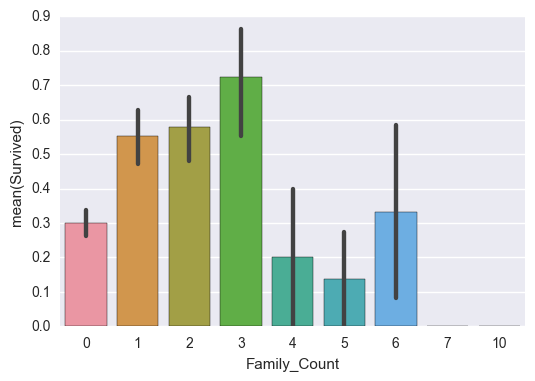

In [41]:
sns.barplot(titanic['Family_Count'], titanic['Survived'])

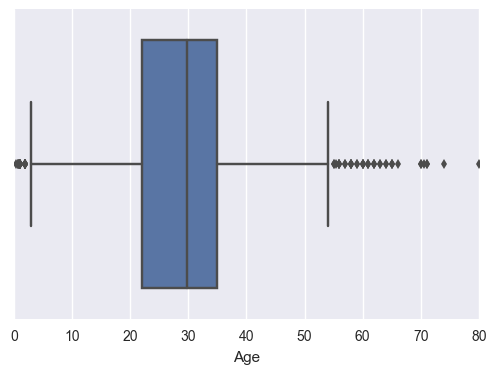

In [42]:
sns.boxplot(titanic['Age'])

/Users/bweinstein413/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


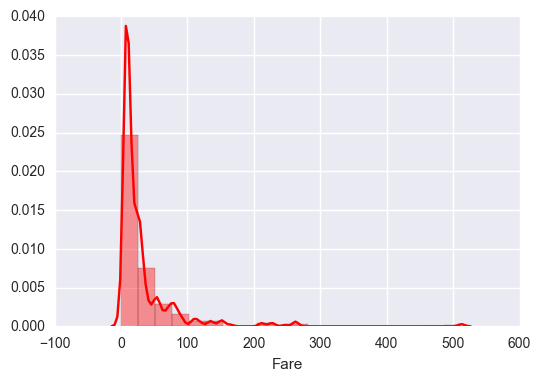

In [43]:
sns.distplot(titanic['Fare'], bins = 20, color = 'r')

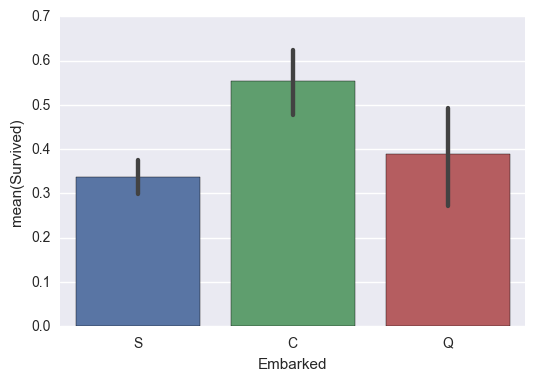

In [44]:
sns.barplot(titanic['Embarked'], titanic['Survived'])

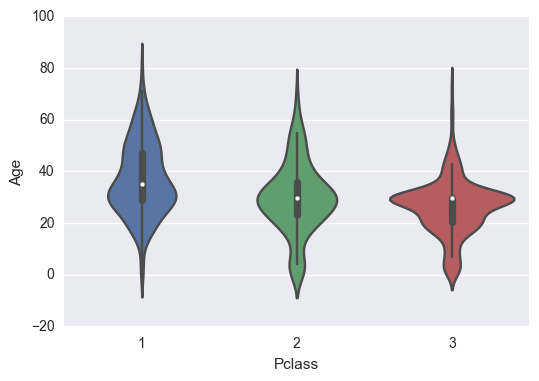

In [45]:
sns.violinplot(titanic['Pclass'],titanic['Age'])